<a href="https://colab.research.google.com/github/shlsharma/Data-Science/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/train.csv')

In [5]:
print(df.head(10))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1      

In [6]:
l = df['label']

In [7]:
d = df.drop('label', axis=1)

In [8]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(l.shape, d.shape)

(42000,) (42000, 784)


1


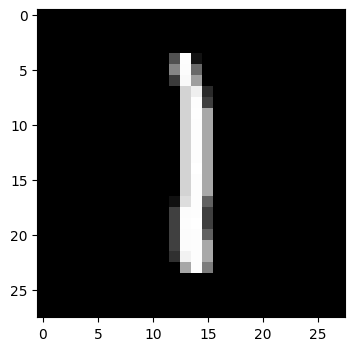

In [20]:
plt.figure(figsize=(4,4))
idx = 1000
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, cmap='gray')
print(l.iloc[idx])

PCA

In [22]:
labels = l.head(15000)
data = d.head(15000)

print("the shape of the sample data = ", data.shape)

the shape of the sample data =  (15000, 784)


In [45]:
# data preprocesing to perform standarization on the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

print('The shape of the standarized data = ', standardized_data.shape)

The shape of the standarized data =  (15000, 784)


<Axes: xlabel='1000', ylabel='Density'>

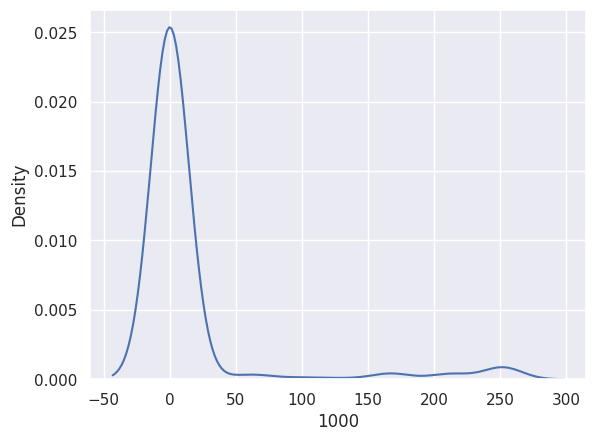

In [41]:
# visualizing both the data on the plot
sns.set_theme()
idx = 1000
sns.kdeplot(data.iloc[idx])

<Axes: ylabel='Density'>

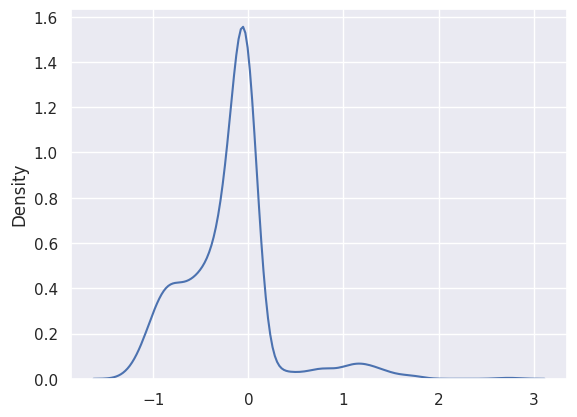

In [42]:
sns.kdeplot(standardized_data[idx])

Manually doing the PCA

In [44]:
sample_data = standardized_data

covariance_matrix = np.matmul(sample_data.T, sample_data)

print('The shape of the covariance matrix is = ', covariance_matrix.shape)

The shape of the covariance matrix is =  (784, 784)


In [49]:
# find the top two eigen-values and corresponding eigen vectors
# for projecting on the 2-dim space

from scipy.linalg import eigh

# the parameter eigvals is defined (low value to heigh value)
# eigh function will return the eigen values in ascending order
# this code generate only the top 2 (782 and 783) eigen values
values, vectors = eigh(covariance_matrix, eigvals=(782, 783))

print("shape of the eigne vectors = ", vectors.shape)

#converting the eigen vectors into (2, d) shape for easyness of further
vectors = vectors.T

print("Updated sjhape of the eigen vectors = ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding to the 1st principle axis
# here the vectors[0] represent the eigen vectoe corresponding to the 2nd principle axis

shape of the eigne vectors =  (784, 2)
Updated sjhape of the eigen vectors =  (2, 784)


<ipython-input-49-5adc2420e399>:9: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covariance_matrix, eigvals=(782, 783))


In [63]:
# projecting on the original data sample on the plane
# formed by two principle eigen vectors by vector-vector multiplication
new_coordinates = np.matmul(vectors, sample_data.T)

# appending the label to the new coordinate
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating the dataframe for plotting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=['1st principle axis', '2nd principle axis', 'label'])

In [ ]:
dataframe.head()

<Figure size 800x800 with 0 Axes>

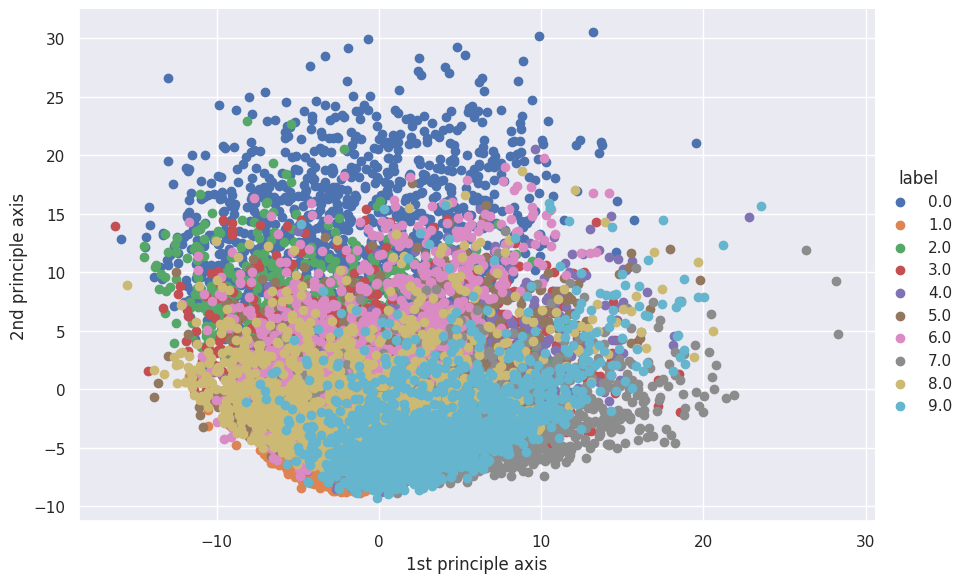

In [72]:
# plotting the data using the sns plot
sns.FacetGrid(dataframe, hue='label', height=6, aspect=1.5).map(plt.scatter, '1st principle axis', '2nd principle axis').add_legend()
plt.show()

PCA using the sckit-learn

In [73]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [74]:
# configure the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain 2-d projection of sample data
print('The shape of the pca_reduced.shape = ', pca_data.shape)

The shape of the pca_reduced.shape =  (15000, 2)


In [76]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating the dataframe which helps us in plotting the result data
pca_df = pd.DataFrame(data=pca_data, columns=['1st principle axis','2nd principle axis', 'label'])

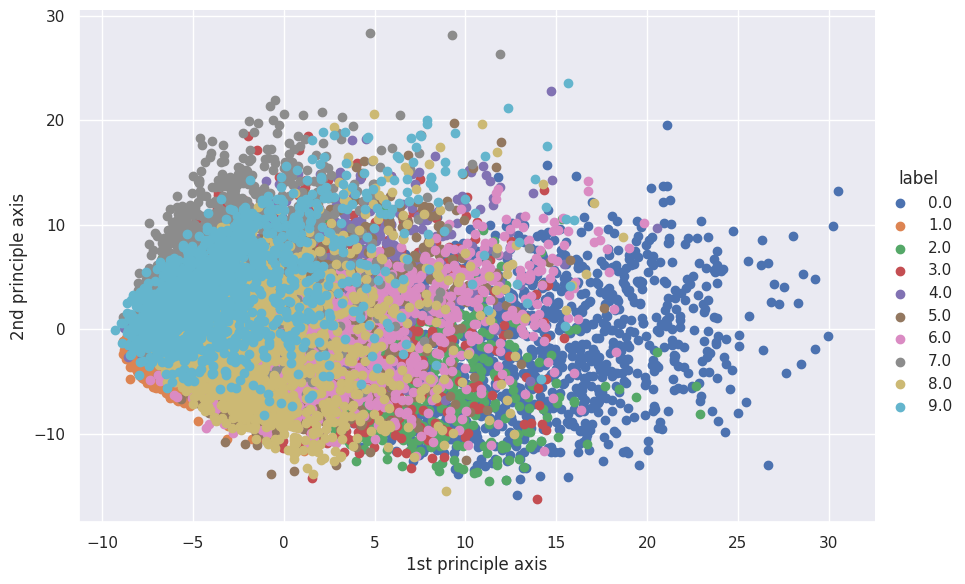

In [77]:
sns.FacetGrid(data=pca_df, hue='label', height=6, aspect=1.5).map(plt.scatter, '1st principle axis', '2nd principle axis').add_legend()
plt.show()